In [70]:
import pandas as pd
import numpy as np

In [71]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/OneDrive/Documents/UNSW DATA SCIENCE/Term 3 2020/Data3001 Data Science In Prac/combined_energy.csv")

In [26]:
# Checking how the data looks like
data.head(12)

,SETTLEMENTDATE,REGIONID,DISPATCHINTERVAL,RRP,ROP,TOTALDEMAND,APCFLAG,RRP5min,ROP5min
0,1/7/08 0:00,NSW1,20080630240,27.43703,27.43703,9027.49,0,2.286419,2.286419
1,1/7/08 0:00,QLD1,20080630240,24.30000,24.30000,5361.52,0,2.025000,2.025000
2,1/7/08 0:00,SA1,20080630240,29.77032,29.77032,1614.93,0,2.480860,2.480860
3,1/7/08 0:00,SNOWY1,20080630240,28.60265,28.60265,16.97,0,2.383554,2.383554
4,1/7/08 0:00,TAS1,20080630240,24.58964,24.58964,1052.28,0,2.049137,2.049137
5,1/7/08 0:00,VIC1,20080630240,27.96721,27.96721,5898.26,0,2.330601,2.330601
6,1/7/08 0:05,NSW1,20080630241,27.82000,27.82000,9067.65,0,2.318333,2.318333
7,1/7/08 0:05,QLD1,20080630241,24.81493,24.81493,5326.79,0,2.067911,2.067911
8,1/7/08 0:05,SA1,20080630241,29.70000,29.70000,1590.49,0,2.475000,2.475000
9,1/7/08 0:05,TAS1,20080630241,22.77314,22.77314,1045.30,0,1.897762,1.897762


In [59]:
data = data[data["REGIONID"] != "TAS1"]
data = data[data["REGIONID"] != "SNOWY1"]

In [60]:
data.describe()
data.median()

DISPATCHINTERVAL    2.009063e+10
RRP                 2.488781e+01
ROP                 2.488778e+01
TOTALDEMAND         5.977580e+03
APCFLAG             0.000000e+00
RRP5min             2.073984e+00
ROP5min             2.073982e+00
dtype: float64

In [61]:
# Drop RRP & ROC because we will use RRP5min & ROP5min\
data.drop(["RRP", "ROP"], axis = 1, inplace = True)

In [62]:
# APCFLAG only 851 enteries that are non zero. Might have to look at it
data[data["APCFLAG"] != 0].count()

SETTLEMENTDATE      829
REGIONID            829
DISPATCHINTERVAL    829
TOTALDEMAND         829
APCFLAG             829
RRP5min             829
ROP5min             829
dtype: int64

In [63]:
############### VARIABLES LEFT THAT ARE IMPORTANT #####################
#### REGION, SETTLEMENT DATE, RRP, ROP, TOTAL DEMAND, APC FLAG #########
#######################################################################

In [64]:
# Checking Unique Regions
data["REGIONID"].unique()

array(['NSW1', 'QLD1', 'SA1', 'VIC1'], dtype=object)

In [75]:
# BELOW WE FOUND THAT LOG PRICES ARE BETTER
data["logPrice"] = np.log(data["RRP5min"])

# Seperating data for each region
region = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']
dataset = [dataNSW, dataQLD, dataSA, dataTAS, dataVIC]

j = 0
for i in dataset:
    i = data[data["REGIONID"] == region[j]]
    j+=1
########## SNOW1 is an unknown region entry. No such region exists. Only 1 row so we drop ##############

NameError: name 'dataNSW' is not defined

In [10]:
# Chart of RRP against time
%matplotlib inline
from matplotlib import pyplot as plt

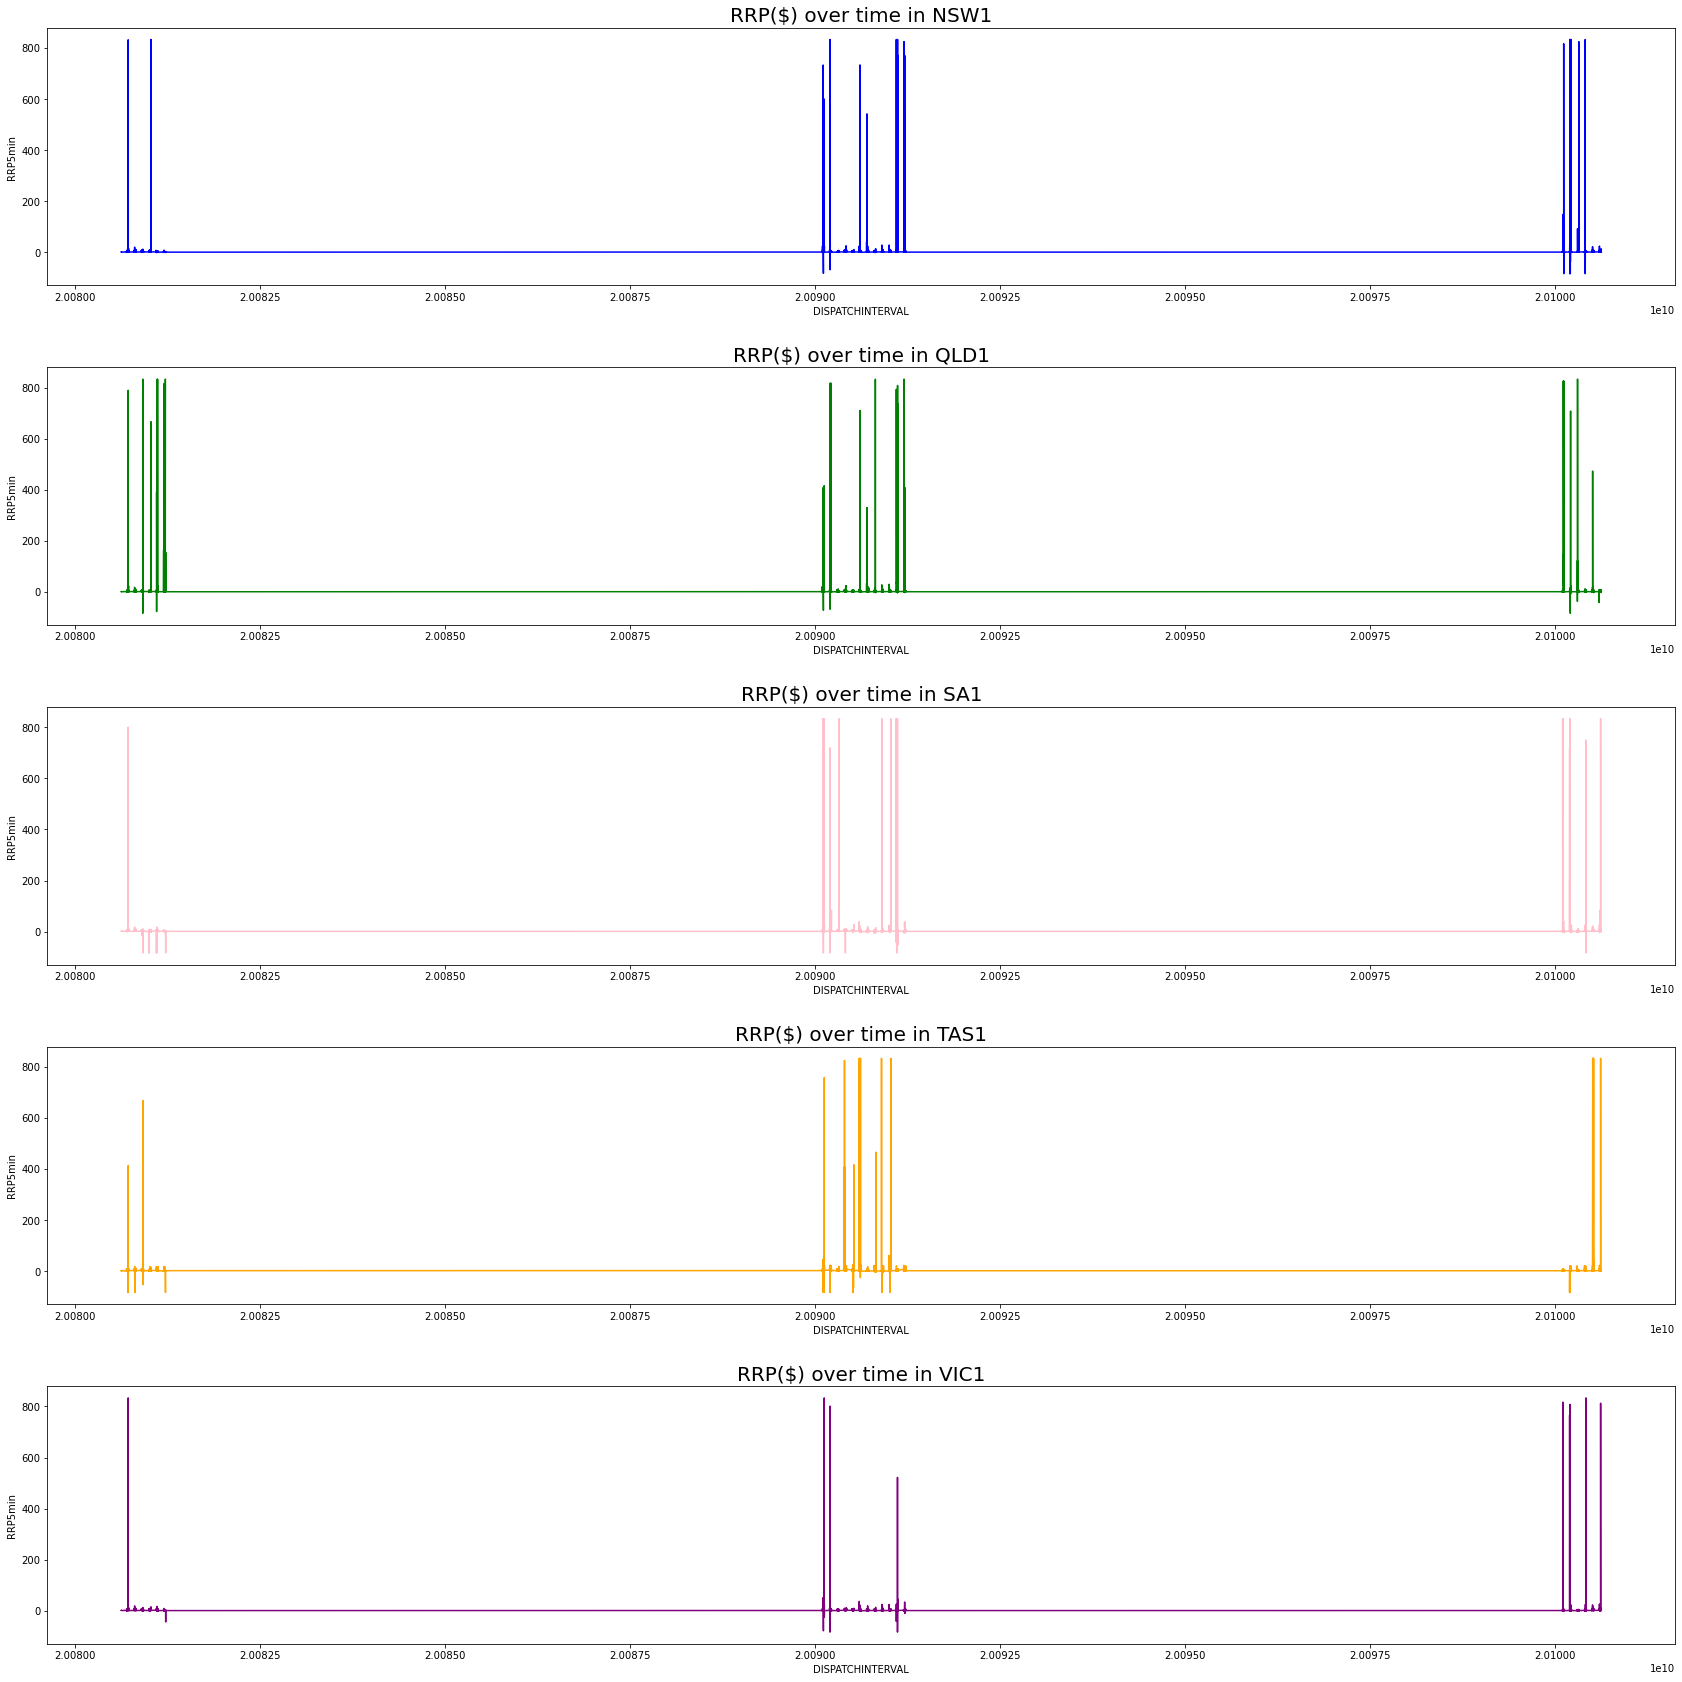

In [27]:
############### PRICES OVER TIME ###################
###### SHOWS HUGH VARIANCE IN PRICES ##############
##### IF WE CAPITALISE THESE BIG SPIKES THEN POTENTIAL FOR HIGH PROFITS ################
##### PRICES IN ONE REGION SHOWS SIMILAR PATTERN TO ALL OTHER STATES ############

def price_plot(axs, data, title, col):
    axs.plot("DISPATCHINTERVAL", "RRP5min", color = col, data = data)
    axs.set_xlabel("DISPATCH INTERVAL")
    axs.set_ylabel("RRP($)")
    axs.set_title(title)

fig, axs = plt.subplots(5, figsize = [24,24])

# Colour 
col = ["blue", "green", "pink", "orange", "purcple"]

j = 0
for i in dataset:
    price_plot(axs[j], i, "RRP($) over time in {}".format(region[j]), col[j])
price_plot(axs[0], dataNSW, "RRP($) over time in NSW", "blue")
price_plot(axs[1], dataQLD, "RRP($) over time in QLD", "green")
price_plot(axs[2], dataSA, "RRP($) over time in SA", "orange")
price_plot(axs[3], dataVIC, "RRP($) over time in VIC", "red")
price_plot(axs[4], dataTAS, "RRP($) over time in TAS", "purple")
fig.tight_layout(pad=3.0)

In [52]:
############## RELATIONSHIP BETWEEN PRICE & DEMAND ########################

# Function to draw the scatter
def price_demand_plot(axs, data, region, col):
    cor = round(np.corrcoef(data["TOTALDEMAND"], data["RRP5min"])[1][0], 2)
    axs.scatter("TOTALDEMAND", "RRP5min", color = col, data = data)
    axs.set_xlabel("TOTALDEMAND", fontsize = 15)
    axs.set_ylabel("RRP($)", fontsize = 15)
    axs.set_title("CORR: {} in {}".format(cor, region), fontsize = 20)
    line = give_me_a_straight_line(data["TOTALDEMAND"],data["RRP5min"])
    axs.plot(data["TOTALDEMAND"],line,'r--', linewidth = 4)
    
# Function to draw line of best fit
def give_me_a_straight_line(x,y):
    w, b  = np.polyfit(x,y,deg=1)
    line  = w * x + b
    return line

fig, axs = plt.subplots(5, figsize = [24,24])

price_demand_plot(axs[0], dataNSW, "NSW", "blue")
price_demand_plot(axs[1], dataQLD, "QLD", "green")
price_demand_plot(axs[2], dataSA, "SA", "orange")
price_demand_plot(axs[3], dataVIC, "VIC", "pink")
price_demand_plot(axs[4], dataTAS, "TAS", "purple")
fig.tight_layout(pad=3.0)

########### VERY SMALL POSITIVE CORRELATION #################

NameError: name 'plt' is not defined

In [55]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

######## WE SEE IN ABOVE PLOTS THAT HIGH VARIABILITY IN PRICING RIPS APART EVERYTHING #####################
######### LETS TRY LOG OF PRICES TO DETER THE PROBLEM ######################

# data["logPrice"] = np.log(data["RRP5min"])
##### WE DO THIS WORKING ABOVE BEFORE SPLITTING DATASET INTO REGIONS #####################

##### LETS NOW PLOT THAT ABOVE SCATTERS AGAINST LOG PRICE

# Function to draw the scatter

def price_demand_plot_1(axs, data, region, col):
   # cor = round(np.corrcoef(data["TOTALDEMAND"], data["logPrice"])[1][0], 2)
    axs.scatter("TOTALDEMAND", "logPrice", color = col, data = data)
    axs.set_xlabel("TOTALDEMAND")
    axs.set_ylabel("logPrice($)")
    axs.set_title("logPrice against Demand in {}".format(region), fontsize = 20)
    
fig, axs = plt.subplots(5, figsize = [24,24])

price_demand_plot_1(axs[0], dataNSW, "NSW", "blue")
price_demand_plot_1(axs[1], dataQLD, "QLD", "green")
price_demand_plot_1(axs[2], dataSA, "SA", "orange")
price_demand_plot_1(axs[3], dataVIC, "VIC", "pink")
price_demand_plot_1(axs[4], dataTAS, "TAS", "purple")
fig.tight_layout(pad=3.0)

############## THIS LOOKS MUCH BETTER #####################
############### VARIABILITY REDUCED ####################

NameError: name 'plt' is not defined

In [14]:
# LETS QUANTIFY THIS CORRELATION
j = 0
for i in dataset:
    print("Correlation between lopPrice & Total Demand in {}: ".format(region[j]), i.corr(method = "pearson")["logPrice"][1])
    j+=1

######## LOOKS LIKE LOG PRICE WORKS WELL #############
######## WE WILL USE FOR FURTHER ANALYSIS ###################

Correlation between lopPrice & Total Demand in NSW1:  0.676949700546527
Correlation between lopPrice & Total Demand in QLD1:  0.565064837338412
Correlation between lopPrice & Total Demand in SA1:  0.6564729265290881
Correlation between lopPrice & Total Demand in SNOWY1:  0.2614117903148889
Correlation between lopPrice & Total Demand in TAS1:  0.7123693519194103


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838859 entries, 0 to 1048573
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   SETTLEMENTDATE    838859 non-null  object 
 1   REGIONID          838859 non-null  object 
 2   DISPATCHINTERVAL  838859 non-null  int64  
 3   TOTALDEMAND       838859 non-null  float64
 4   APCFLAG           838859 non-null  int64  
 5   RRP5min           838859 non-null  float64
 6   ROP5min           838859 non-null  float64
 7   logPrice          837492 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 57.6+ MB


In [68]:
start_time = pd.Timestamp(year=2019, month=11, day=2, hour=23)
end_time = pd.Timestamp(year=2019, month=11, day=3, hour=3)

In [72]:
time_test_1 = data[start_time:end_time]
time_test_1

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2019-11-02 23:00:00] of <class 'pandas._libs.tslibs.timestamps.Timestamp'>

In [74]:
dataNSW

NameError: name 'dataNSW' is not defined